<a href="https://colab.research.google.com/github/anshupandey/Natural_language_Processing/blob/master/Case_Study_Sentiment_Analysis_Amazon_Mobile_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study: Sentiment Analysis

### Data Prep

In [ ]:
# This dataset also requires cleaning text and removing unwanted tokens using regular expressions,
# this part is not covered in this notebook to save time but strongly recommeded to perform.

In [1]:
!wget -q https://www.dropbox.com/s/6akxxtsfko5banv/Amazon_Unlocked_Mobile.csv

In [2]:
import pandas as pd
import numpy as np

# Read in the data
df = pd.read_csv(r"Amazon_Unlocked_Mobile.csv")
print(df.shape)
# Sample the data to speed up computation
df = df.sample(frac=0.2, random_state=10)
print(df.shape)
df.head()

(413840, 6)
(82768, 6)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
394349,Sony XPERIA Z2 D6503 FACTORY UNLOCKED Internat...,NaN,244.95,5,Very good one! Better than Samsung S and iphon...,0.0
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0


In [3]:
# Drop missing values
df.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]

# Encode 4s and 5s as 1 (rated positively)
# Encode 1s and 2s as 0 (rated poorly)
df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)
print(df.shape)
df.head(10)


(61530, 7)


<ipython-input-3-a79666979ac3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0,0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0,1
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0,0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0,1
277158,Nokia N8 Unlocked GSM Touch Screen Phone Featu...,Nokia,95.00,5,I fell in love with this phone because it did ...,0.0,1
100311,Blackberry Torch 2 9810 Unlocked Phone with 1....,BlackBerry,77.49,5,I am pleased with this Blackberry phone! The p...,0.0,1
251669,Motorola Moto E (1st Generation) - Black - 4 G...,Motorola,89.99,5,"Great product, best value for money smartphone...",0.0,1
279878,OtterBox 77-29864 Defender Series Hybrid Case ...,OtterBox,9.99,5,I've bought 3 no problems. Fast delivery.,0.0,1
406017,Verizon HTC Rezound 4G Android Smarphone - 8MP...,HTC,74.99,4,Great phone for the price...,0.0,1
302567,"RCA M1 Unlocked Cell Phone, Dual Sim, 5Mp Came...",RCA,159.99,5,My mom is not good with new technoloy but this...,4.0,1


In [4]:
# Most ratings are positive
df['Positively Rated'].mean()

0.7480578579554689

In [5]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'],
                                                    df['Positively Rated'],
                                                    random_state=0)

In [6]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 Very good in this price...


X_train shape:  (46147,)


In [7]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(46147,) (15383,)
(46147,) (15383,)


# CountVectorizer

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [10]:
vect.get_feature_names_out()[::2000]

array(['00', 'advertized', 'blessed', 'condescending', 'distorted',
       'figures', 'hindsight', 'launge', 'nanotechnology', 'pixle',
       'remarkable', 'sll', 'thoes', 'wars'], dtype=object)

In [11]:
len(vect.get_feature_names_out())

27005

In [12]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<46147x27005 sparse matrix of type '<class 'numpy.int64'>'
	with 1221142 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression(max_iter=500)
model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=500)

In [14]:
# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

In [15]:
model.score(vect.transform(X_test),y_test)

0.9370733927062341

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      3882
           1       0.95      0.97      0.96     11501

    accuracy                           0.94     15383
   macro avg       0.93      0.91      0.91     15383
weighted avg       0.94      0.94      0.94     15383

[[ 3268   614]
 [  354 11147]]


In [17]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names_out())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1]
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['worst' 'junk' 'terrible' 'poor' 'crashed' 'useless' 'garbage' 'slow'
 'waste' 'horrible']

Largest Coefs: 
['excelente' 'excelent' 'excellent' 'love' 'loves' 'perfect' 'awesome'
 'amazing' 'great' 'best']


# Tfidf

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names_out())

7782

In [24]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      3882
           1       0.95      0.97      0.96     11501

    accuracy                           0.94     15383
   macro avg       0.93      0.90      0.91     15383
weighted avg       0.94      0.94      0.94     15383

[[ 3253   629]
 [  347 11154]]


In [25]:
feature_names = np.array(vect.get_feature_names_out())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['swoop' 'shells' 'realization' 'p3' 'bokeh' '61' 'stealing' 'foxfi'
 'printer' '5v']

Largest tfidf: 
['celular' 'cel' 'wow' 'producto' 'yet' 'yep' 'worst' 'productos' 'yes'
 'products']


In [26]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'worst' 'disappointed' 'slow' 'return' 'doesn' 'poor' 'terrible'
 'waste' 'horrible']

Largest Coefs: 
['great' 'love' 'excellent' 'perfect' 'best' 'good' 'amazing' 'far'
 'awesome' 'excelente']


In [ ]:
# These reviews are treated the same by our current model
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


# n-grams

In [28]:
# Fit the CountVectorizer to the training data specifiying a minimum
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=8, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names_out())

32513

In [29]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      3882
           1       0.96      0.98      0.97     11501

    accuracy                           0.95     15383
   macro avg       0.94      0.93      0.94     15383
weighted avg       0.95      0.95      0.95     15383

[[ 3429   453]
 [  285 11216]]


In [33]:
feature_names = np.array(vect.get_feature_names_out())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['no good' 'junk' 'worst' 'poor' 'horrible' 'terrible' 'not good' 'broken'
 'didnt' 'not satisfied']

Largest Coefs: 
['excelente' 'excellent' 'not bad' 'excelent' 'perfect' 'great'
 'no problems' 'awesome' 'love' 'amazing']


In [34]:
# These reviews are now correctly identified
print(model.predict(vect.transform(['not an issue, phone is good',
                                    'an issue, phone is not good'])))

[1 0]


In [42]:
for k in X_train:
  if "no good" in k:
    print(k)
    print("xxx"*10)

Bought for my 9 yr old...he likes it bit I dont. Camera is horrible, dark quality and "grainy". I wish I hadn't wasted my money on this. He had an Alcatel brand and this is the same - no good! Please don't waste your money. Screen is not 4" either, more like 2.5" or 3". Horrible camera!!!!!
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Always buy things from amazon directly, they are responsable and everything always arrive fast and just like you ordered, excellent cell phone, the only down is the camera wich has no good resolution and no flash, but the rest ist OK
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
This phone is no good. Is not working.my money waste.it never works .the phone keep on restarting
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Always buy things from amazon directly, they are responsable and everything always arrive fast and just like you ordered, excellent cell phone, the only down is the camera wich has no good resolution and no flash, but the rest ist OK
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Unhappy...This pho

# LSTM

In [40]:
from tensorflow.keras import models,layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [41]:
x= df['Reviews']
y = df['Positively Rated']
print(x.shape)
print(y.shape)

(61530,)
(61530,)


In [43]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 120

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',
                      lower=True)

tokenizer.fit_on_texts(x.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 32361 unique tokens.


In [44]:
#making every reviview of size 250 tokens
x = tokenizer.texts_to_sequences(x.values)
x = pad_sequences(x, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x.shape)

Shape of data tensor: (61530, 250)


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(55377, 250) (55377,)
(6153, 250) (6153,)


In [ ]:
input_layer = layers.Input(shape=(250,))
embedding_layer = layers.Embedding(MAX_NB_WORDS,EMBEDDING_DIM)(input_layer)
spatial = layers.SpatialDropout1D((0.2))(embedding_layer)
lstm = layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2)(spatial)
op_layer = layers.Dense(1,activation='sigmoid')(lstm)

model = models.Model(inputs=input_layer,outputs=op_layer)
model.summary()

In [47]:
#model = models.Sequential()
#model.add(layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=x.shape[1]))
#model.add(layers.SpatialDropout1D(0.2))
#model.add(layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
#model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=10, batch_size=1000,validation_data=(X_test,Y_test),
                    verbose=True)

Epoch 1/10
56/56 [==============================] - 69s 1s/step - loss: 0.4578 - accuracy: 0.7855 - val_loss: 0.2706 - val_accuracy: 0.8877
Epoch 2/10
56/56 [==============================] - 62s 1s/step - loss: 0.2013 - accuracy: 0.9223 - val_loss: 0.1654 - val_accuracy: 0.9404
Epoch 3/10
56/56 [==============================] - 56s 1s/step - loss: 0.1407 - accuracy: 0.9504 - val_loss: 0.1470 - val_accuracy: 0.9473
Epoch 4/10
56/56 [==============================] - 57s 1s/step - loss: 0.1162 - accuracy: 0.9596 - val_loss: 0.1437 - val_accuracy: 0.9467
Epoch 5/10
56/56 [==============================] - 58s 1s/step - loss: 0.1032 - accuracy: 0.9648 - val_loss: 0.1609 - val_accuracy: 0.9473
Epoch 6/10
56/56 [==============================] - 72s 1s/step - loss: 0.0943 - accuracy: 0.9689 - val_loss: 0.1487 - val_accuracy: 0.9517
Epoch 7/10
56/56 [==============================] - 54s 976ms/step - loss: 0.0825 - accuracy: 0.9733 - val_loss: 0.1450 - val_accuracy: 0.9517
Epoch 8/10
56/56 

In [48]:
loss,accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(loss,accr))

193/193 [==============================] - 20s 104ms/step - loss: 0.1748 - accuracy: 0.9488
Test set
  Loss: 0.175
  Accuracy: 0.949


In [49]:
X_test.shape

(6153, 250)

In [50]:
model.predict(X_test).shape

193/193 [==============================] - 20s 103ms/step


(6153, 1)

In [51]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250)]             0         
                                                                 
 embedding (Embedding)       (None, 250, 120)          2400000   
                                                                 
 spatial_dropout1d (Spatial  (None, 250, 120)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               88400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 2488501 (9.49 MB)
Trainable params: 2488501 (9.49 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________

In [52]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min',verbose=1)
history = model.fit(X_train, Y_train, epochs=10, batch_size=1000,validation_data=(X_test,Y_test),callbacks=[es],
                    verbose=True)

Epoch 1/10
56/56 [==============================] - 61s 1s/step - loss: 0.0628 - accuracy: 0.9803 - val_loss: 0.1676 - val_accuracy: 0.9517
Epoch 2/10
56/56 [==============================] - 55s 963ms/step - loss: 0.0597 - accuracy: 0.9811 - val_loss: 0.1888 - val_accuracy: 0.9496
Epoch 2: early stopping


Weight calculation in LSTM

`Total weights = 4 x [(size of input + 1)*(size of output) + (size of output^2)]`

total weights = 4*[(120+1)*100 + (100*100)]

array([[0.00177595],
       [0.9999622 ],
       [0.49591604],
       ...,
       [0.99952555],
       [0.9989831 ],
       [0.9998079 ]], dtype=float32)

In [ ]:
predictions = model.predict(X_test)
predictions = np.where(predictions>=0.5,1,0)
print(classification_report(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1608
           1       0.95      0.98      0.96      4546

    accuracy                           0.95      6154
   macro avg       0.94      0.92      0.93      6154
weighted avg       0.95      0.95      0.95      6154

[[1396  212]
 [ 111 4435]]


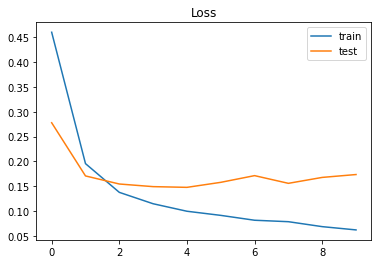

In [ ]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

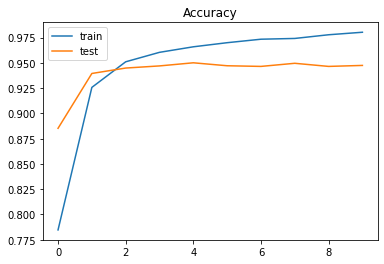

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()